In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas import *
from itertools import groupby
np.random.seed(1234)


run-20220420_14035000-tag-Train_v.csv
run-20220420_14035000-tag-Test Error_v.csv
run-20220420_14035000-tag-Train_u.csv
run-20220420_14035000-tag-Test Error_u.csv
[['run-20220420_14035000-tag-Test Error_u.csv', 'run-20220420_14035000-tag-Test Error_v.csv', 'run-20220420_14035000-tag-Train_u.csv', 'run-20220420_14035000-tag-Train_v.csv']]
2 2 ['test error', 'train error']
2 2 ['test error', 'train error']


<Figure size 432x288 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

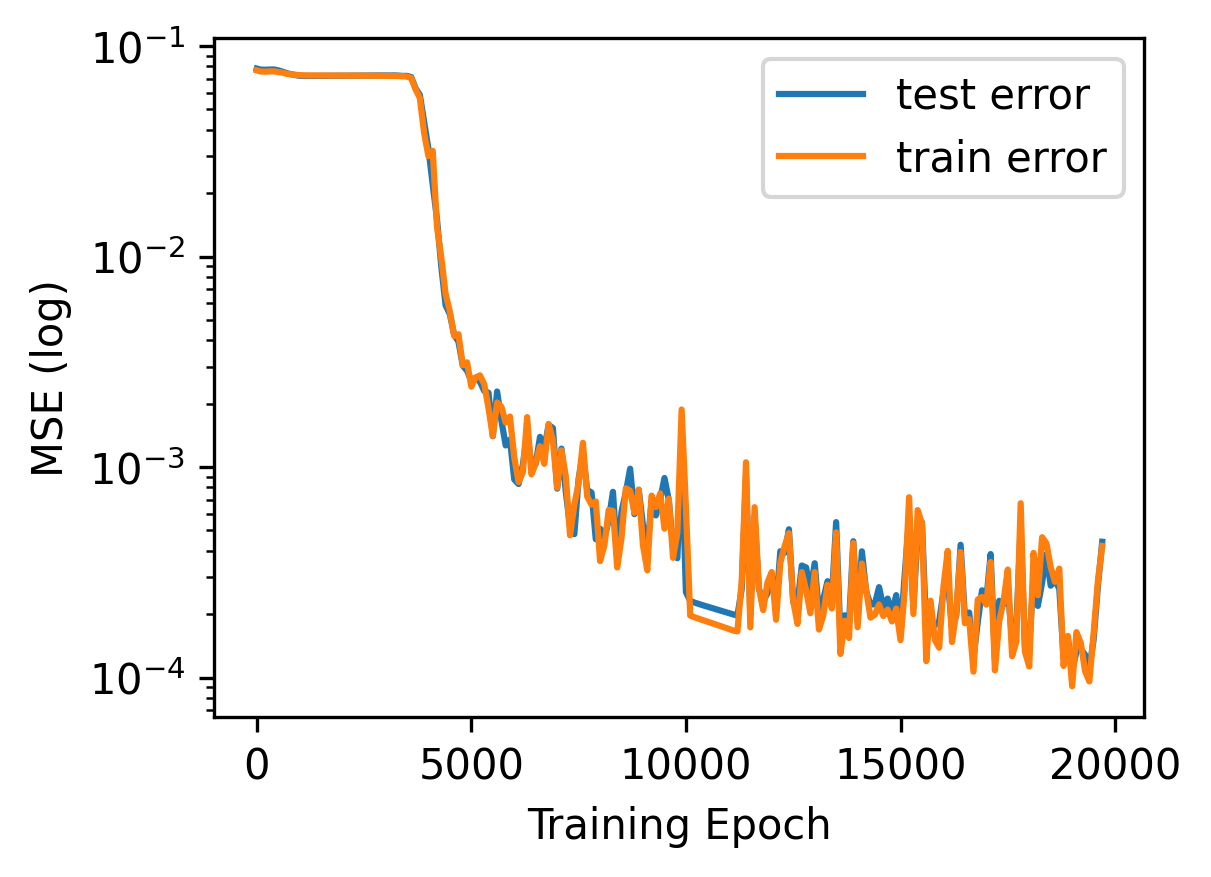

In [10]:
data_path = './data/train'
files = []
file_paths = []
for file in os.listdir(data_path):
    print(file)
    files.append(file)

# group by training date
files = [list(g) for k, g in groupby(sorted(files), lambda x: x.split('_', 1)[0])]
files.sort(key=lambda s: len(s))
print(files)

def plot(xs, ys, ls, savepath=''):
    plt.clf()
    plt.figure(figsize=(4, 3), dpi=300)
    print(len(xs), len(ys), ls)
    for x, y, l in zip(xs, ys, ls):
        plt.plot(x,y,label=l)
    plt.legend()
    plt.title(savepath.upper().split('.')[0])
    plt.yscale('log')
    plt.ylabel('MSE (log)')
    plt.xlabel('Training Epoch')
    plt.savefig(savepath, bbox_inches='tight', dpi=300)

xs, ys = [], []
for f in files[0]: # the first group
    if '_u' in f:
        file_path = os.path.join(data_path, f)
        data = read_csv(file_path)
        xs.append(data['Step'])
        ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_u.png')


xs, ys = [], []
for f in files[0]: # the first group
    if '_v' in f:
        file_path = os.path.join(data_path, f)
        data = read_csv(file_path)
        xs.append(data['Step'])
        ys.append(data['Value'])
plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/compare_v.png')


# for i, f in enumerate(files[0]):
#     file_path = os.path.join(data_path, f)
#     print(f)
#     data = read_csv(file_path)
#     xs.append(data['Step'])
#     ys.append(data['Value'])
#     if (i+1) % 2 == 0:
#         figname = 'compare_u' if '_u' in f else 'compare_v'
#         plot(xs, ys, ls=['test error', 'train error'], savepath=f'./figures/{figname}.png')
#         xs, ys = [], []



In [12]:
data = read_csv(file_path)
print(data.keys())

Index(['Wall time', 'Step', 'Value'], dtype='object')


In [ ]:
data['Step']
data['Value']